# Outliers:

- data points deviating significantly from the rest of the data...

1. Global Outliers:
    - isolated datapoints away from main body of data. [esy to find / remove].

2. Contextual Outliers:
    - In one context they are outliers but in other they are not. Handling such outlier requires to have domain knowledge.

## Outlier Detection Methods:

1. Statistical Methods: [z-score, interquartile range].
2. Distance-Based Methods: [KNN, Local Outlier Factor (density based)]
3. Clustering Based Methods: [DBSCAN, Hierarchical].
4. Others: [Isolation Forest, One-Class SVM].

- Initially I am focusing on only statistical methods for outliers detection...
- Once the outliers are detected we remove them.
- There are many more methods to avoid the influence of outliers like Data Transformation (Scaling, log transformation, etc), separate feature addition (outlier present/not pre.), Estimations, etc... totally depends on the use case.

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

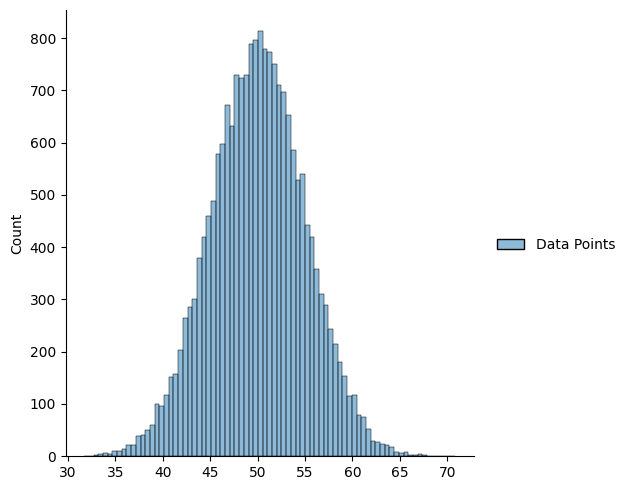

In [38]:
# Generating Sample data (univariate)...

np.random.seed(1)
data = 5 * np.random.randn(20000) + 50
df = pd.DataFrame(data, columns=['Data Points'])
sns.displot(df)

In [36]:
data_mean = df['Data Points'].mean()
data_std = df['Data Points'].std()

print(f"Mean: {data_mean} | Std: {data_std}")

Mean: 50.04802017536552 | Std: 5.000066476802009


### 1. Outliers Detection & Removal using Z_score:

- This is calculated as follow:
z = (x - mean) / std
- We will take the elements lying in range [-3,3] of z-scores.

In [41]:
lower_bound = -3*data_std + data_mean
upper_bound = 3*data_std + data_mean

print(f"""Lower Bound: {lower_bound}
Upper Bound: {upper_bound}""")

Lower Bound: 35.047820744959495
Upper Bound: 65.04821960577155


- Outlier Detection:

In [61]:
outliers = df[(df['Data Points'] < lower_bound) | (df['Data Points'] > upper_bound)]

print(f"Total Outliers (via Z-score): {outliers.count().iloc[0]}")

Total Outliers (via Z-score): 56


- Outlier Removal:

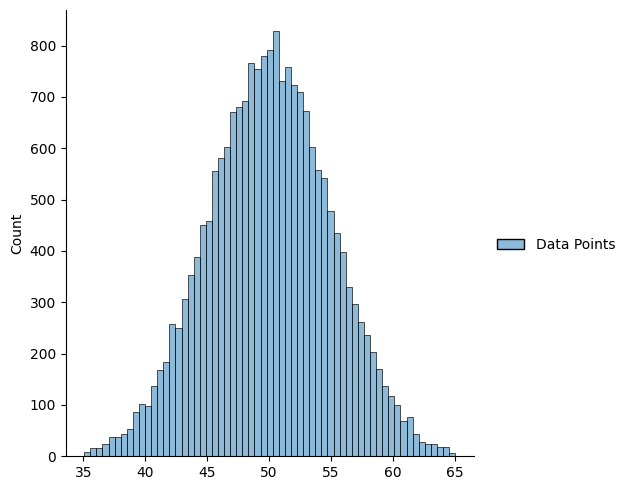

In [67]:
# DataFrame without Outliers...
clean_df = df[(df['Data Points'] > lower_bound) & (df['Data Points'] < upper_bound)]

sns.displot(clean_df)

### 2. Outliers Detection & Removal using IQR:

- IQR is basically interquartile range (we can simply visualize this by using boxplots)
- We will take the same old data (df) to look for outliers...
- The dots we see outside the box plots are basically outliers...

Text(0.5, 1.0, 'Data Points')

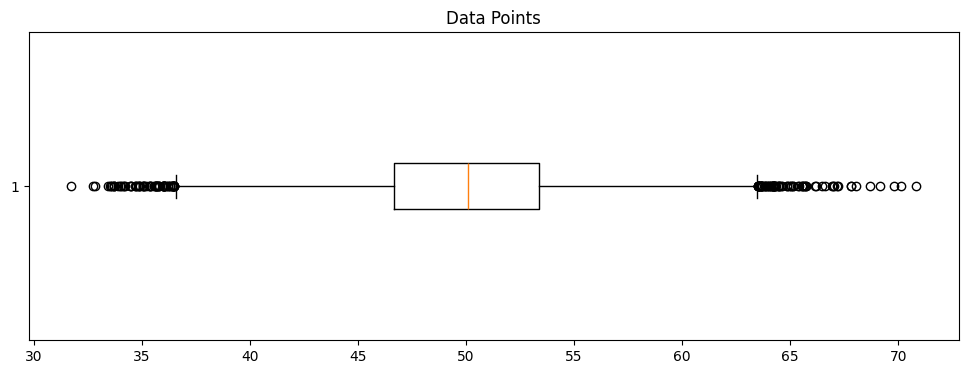

In [71]:
fig= plt.figure(figsize=(12,4))
plt.boxplot(df, vert=False)
plt.title("Data Points")

In [76]:
def detect_outliers_IQR(df: pd.DataFrame):
    sorted_df = df.sort_values(by = ['Data Points'])
    Q1 = sorted_df['Data Points'].quantile(q=0.25)
    Q3 = sorted_df['Data Points'].quantile(q=0.75)
    IQR = Q3 - Q1
    print(Q1, Q3)
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    
    outliers = df[(df['Data Points'] < lower_bound) | (df['Data Points'] > upper_bound)]
    clean_df = df[(df['Data Points'] > lower_bound) & (df['Data Points'] < upper_bound)]    
    return outliers, clean_df
    

46.66609618024197 53.40033041183774
Total Outliers (via Z-score): 146


Text(0.5, 1.0, 'Data Points - Clean Data (without outliers)')

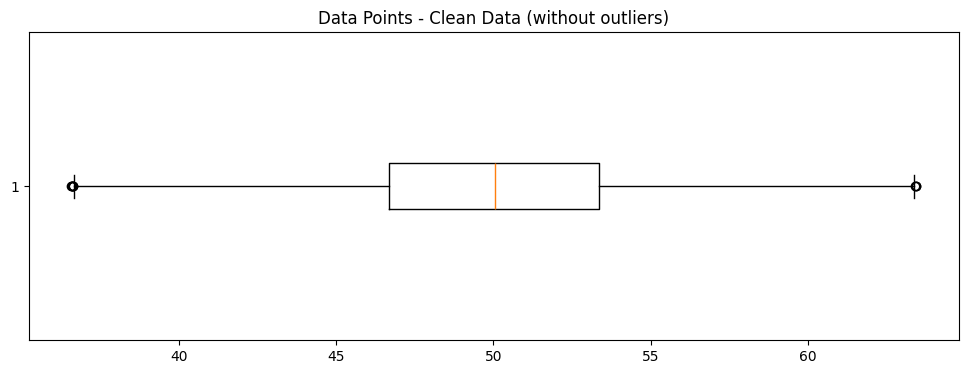

In [ ]:
outliers, clean_df = detect_outliers_IQR(df)

print(f"Total Outliers (via IQR-score): {outliers.count().iloc[0]}")
fig= plt.figure(figsize=(12,4))
plt.boxplot(clean_df, vert=False)
plt.title("Data Points - Clean Data (without outliers)")


---
Notes by Kirtan Ghelani @sculptsoft